In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv")

In [3]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#MCAR

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
#missing not at random

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
median=df['Age'].median()       # or df.Age.median()

In [11]:
df['Age_median']=df['Age'].fillna(median)   # new column was created as Age_median

In [12]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [13]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


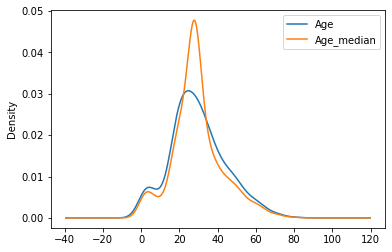

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [15]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)

In [16]:
median=df['Age'].median()       # or df.Age.median()
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [17]:
impute_nan(df,'Age',median)

In [18]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


<AxesSubplot:ylabel='Frequency'>

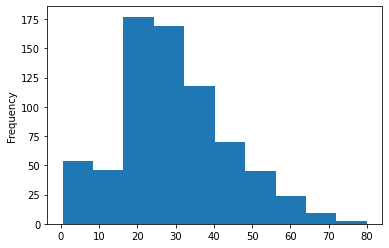

In [19]:
df['Age'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

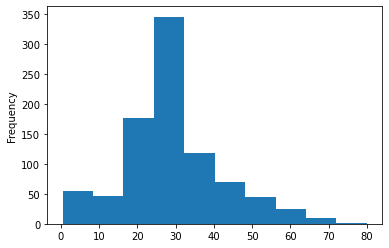

In [20]:
df['Age_median'].plot(kind='hist')

press m after typing the required  while outside the column to display like this

Random Sample Imputation

In [21]:
df=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
df['Age'].dropna().sample(df['Age'].isnull().sum())        

# sample gives the sample value from the selected.

307    17.00
242    29.00
469     0.75
691     4.00
9      14.00
       ...  
621    42.00
788     1.00
678    43.00
771    48.00
197    42.00
Name: Age, Length: 177, dtype: float64

In [23]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

# random state fixes the order of sample


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [24]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [25]:
random_sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [26]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [27]:
random_sample.index=df[df['Age'].isnull()].index

In [28]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [29]:
df.loc[df['Age'].isnull(),'Age']    

#df loaded has only age fare survived. loc gives all the rows like just df[]. to get age only add age after isnull

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [30]:
df.loc[df['Age'].isnull(),'Age'] = random_sample

In [31]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [32]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [33]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample
    

In [34]:
df=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv',usecols=['Age','Fare','Survived'])

In [35]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [36]:
impute_nan(df,'Age',median)

In [37]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:ylabel='Density'>

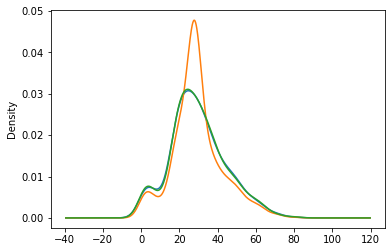

In [38]:
df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde')
df['Age_random'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

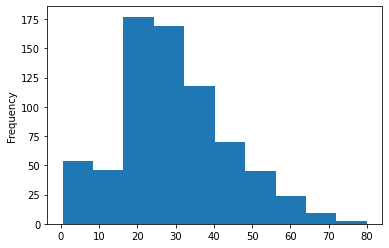

In [39]:
df.Age.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

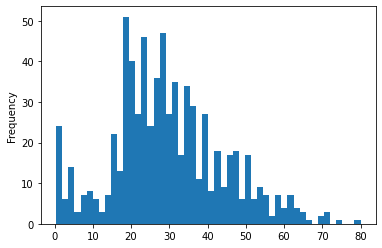

In [40]:
df.Age.plot(kind='hist',bins=50)

Capturing NaN values with 

In [41]:
db=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv',usecols=['Age','Fare','Survived'])

In [42]:
db['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [43]:
db['Age_na']=np.where(df['Age'].isnull,1,0)
db['Age'].fillna(df['Age'].median,inplace=True)

# gives an array where the value is null is given as 1 and 0 for column with value

In [44]:
db

,Survived,Age,Fare,Age_na
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,1
3,1,35.0,53.1000,1
4,0,35.0,8.0500,1
...,...,...,...,...
886,0,27.0,13.0000,1
887,1,19.0,30.0000,1
888,0,<bound method NDFrame._add_numeric_operations....,23.4500,1
889,1,26.0,30.0000,1


In [45]:
db['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

C:\Users\prave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

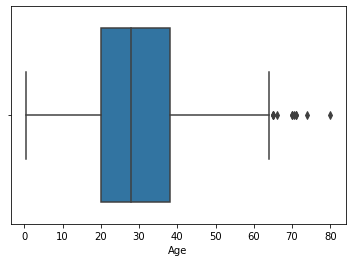

In [46]:
import seaborn as sns

sns.boxplot('Age',data=df)

In [47]:
df['Age'].std()

14.526497332334044

In [48]:
extreme=df['Age'].mean()+3*df['Age'].std()

In [49]:
df['Age_extreme']=df['Age'].fillna(extreme)

In [50]:
df

,Survived,Age,Fare,Age_median,Age_random,Age_extreme
0,0,22.0,7.2500,22.0,22.0,22.00000
1,1,38.0,71.2833,38.0,38.0,38.00000
2,1,26.0,7.9250,26.0,26.0,26.00000
3,1,35.0,53.1000,35.0,35.0,35.00000
4,0,35.0,8.0500,35.0,35.0,35.00000
...,...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0,27.00000
887,1,19.0,30.0000,19.0,19.0,19.00000
888,0,NaN,23.4500,28.0,15.0,73.27861
889,1,26.0,30.0000,26.0,26.0,26.00000


C:\Users\prave\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_extreme'>

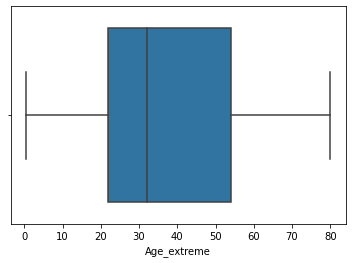

In [51]:
sns.boxplot('Age_extreme',data=df)

In [52]:
df=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\loan.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
df=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [55]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [56]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [57]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [58]:
df.BsmtQual.mode()[0]

'TA'

In [59]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

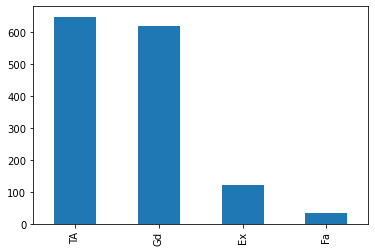

In [60]:
df.BsmtQual.value_counts().plot.bar()

In [61]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [62]:
df['GarageType'].mode()[0]

'Attchd'

In [63]:
def impute_Nan(df,variable):
    mode=df[variable].mode()[0]
    df[variable+'_mode']=df[variable].fillna(mode)

In [64]:
impute_Nan(df,'GarageType')

In [65]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_mode
0,Gd,NaN,Attchd,208500,Attchd
1,Gd,TA,Attchd,181500,Attchd
2,Gd,TA,Attchd,223500,Attchd
3,TA,Gd,Detchd,140000,Detchd
4,Gd,TA,Attchd,250000,Attchd
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Attchd
1456,Gd,TA,Attchd,210000,Attchd
1457,TA,Gd,Attchd,266500,Attchd
1458,TA,NaN,Attchd,142125,Attchd


In [66]:
impute_Nan(df,'BsmtQual')

In [67]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_mode,BsmtQual_mode
0,Gd,NaN,Attchd,208500,Attchd,Gd
1,Gd,TA,Attchd,181500,Attchd,Gd
2,Gd,TA,Attchd,223500,Attchd,Gd
3,TA,Gd,Detchd,140000,Detchd,TA
4,Gd,TA,Attchd,250000,Attchd,Gd
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Attchd,Gd
1456,Gd,TA,Attchd,210000,Attchd,Gd
1457,TA,Gd,Attchd,266500,Attchd,TA
1458,TA,NaN,Attchd,142125,Attchd,TA


In [68]:
impute_Nan(df,'FireplaceQu')
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_mode,BsmtQual_mode,FireplaceQu_mode
0,Gd,NaN,Attchd,208500,Attchd,Gd,Gd
1,Gd,TA,Attchd,181500,Attchd,Gd,TA
2,Gd,TA,Attchd,223500,Attchd,Gd,TA
3,TA,Gd,Detchd,140000,Detchd,TA,Gd
4,Gd,TA,Attchd,250000,Attchd,Gd,TA
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Attchd,Gd,TA
1456,Gd,TA,Attchd,210000,Attchd,Gd,TA
1457,TA,Gd,Attchd,266500,Attchd,TA,Gd
1458,TA,NaN,Attchd,142125,Attchd,TA,Gd


In [69]:
impute_Nan(df,'SalePrice')
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_mode,BsmtQual_mode,FireplaceQu_mode,SalePrice_mode
0,Gd,NaN,Attchd,208500,Attchd,Gd,Gd,208500
1,Gd,TA,Attchd,181500,Attchd,Gd,TA,181500
2,Gd,TA,Attchd,223500,Attchd,Gd,TA,223500
3,TA,Gd,Detchd,140000,Detchd,TA,Gd,140000
4,Gd,TA,Attchd,250000,Attchd,Gd,TA,250000
...,...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Attchd,Gd,TA,175000
1456,Gd,TA,Attchd,210000,Attchd,Gd,TA,210000
1457,TA,Gd,Attchd,266500,Attchd,TA,Gd,266500
1458,TA,NaN,Attchd,142125,Attchd,TA,Gd,142125


<AxesSubplot:>

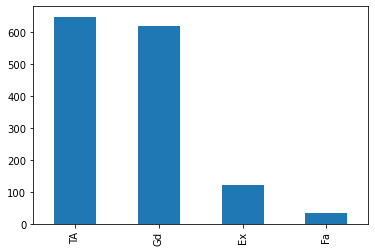

In [70]:
df.BsmtQual.value_counts().plot.bar()

<AxesSubplot:>

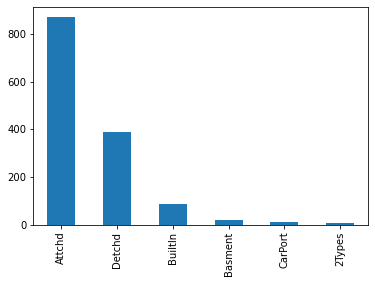

In [71]:
df['GarageType'].value_counts().plot.bar()

In [72]:
df=pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\loan.csv')

In [73]:
df.FireplaceQu.fillna('Others',inplace=True)

<AxesSubplot:>

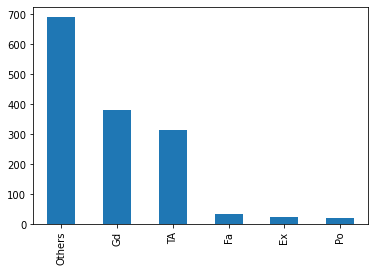

In [74]:
df.FireplaceQu.value_counts().plot.bar()

Handling Categorical features

Types

Nominal Encoding and
ordinal encoding

Nominal-- a ranking cant be made out of that categorical variables
eg:Gender
1) one-hot encoding
2) one-hot encoding with many categories
3) mean encoding

Ordinal- Can be graded or ranked

1) Count or frequency encoding
2) Target guided Encoding

One-Hot Encoding

In [75]:
import pandas as pd
import numpy as np

df=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv", usecols=['Sex'])

In [76]:
df

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [77]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [78]:
pd.get_dummies(df).head()  

# usually pd.get_dummies(df['Sex]).head()  Here only one columnn is taken as df

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [79]:
df=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv",usecols=['Sex','Embarked'])

In [80]:
pd.get_dummies(df,columns=['Sex','Embarked']).head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [81]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [82]:
df.dropna()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [83]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True).head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [85]:
pd.get_dummies(df,columns=['Sex','Embarked'])

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


one-hot encoding with may categorical feature

In [86]:
df1=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\mercedes.csv",usecols=['X0','X1','X2','X3','X4','X5','X6'])

In [87]:
df1

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [88]:
df1['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [89]:
df1['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [90]:
pd.get_dummies(df1)

# since the number of columns is too high we may select only columns with more number of categories.
#  and get_dummies is avoided by following steps

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X6_c,X6_d,X6_e,X6_f,X6_g,X6_h,X6_i,X6_j,X6_k,X6_l
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4206,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [91]:
len(df1['X0'].unique())

47

In [92]:
for i in df1.columns:
    print('For columns',i,'the unique labels found is ',len(df1[i].unique()))

For columns X0 the unique labels found is  47
For columns X1 the unique labels found is  27
For columns X2 the unique labels found is  44
For columns X3 the unique labels found is  7
For columns X4 the unique labels found is  4
For columns X5 the unique labels found is  29
For columns X6 the unique labels found is  12


In [93]:
lst10=df1['X0'].value_counts().sort_values(ascending=False).head(10).index  # gives 10 most repetiting values

In [94]:
lst10

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [95]:
# get_dummies Cant be used since we get the category name not column name

for i in lst10:
    df1[i]=np.where(df1['X0']==i,1,0)

# checks for each in the list created and where ever the value is true, 1 is imputed else 0 is imputed

In [96]:
df1.head()

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0


In [97]:
df1.drop('X0',axis=1,inplace=True)

In [98]:
df1

,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


In [99]:
df1['X1'].value_counts()

# the values which can affect may only be taken.

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [100]:
lst1_1=df1['X1'].value_counts().sort_values(ascending=False).head(10).index

In [101]:
lst1_1

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [102]:
for i in lst1_1:
    df1[i]=np.where(df1['X1']==i,1,0)

In [103]:
df1

,X1,X2,X3,X4,X5,X6,z,ak,y,ay,...,w,aa,s,b,l,v,r,i,a,c
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,s,as,c,d,aa,d,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4205,o,t,d,d,aa,h,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,v,r,a,d,aa,g,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4207,r,e,f,d,aa,l,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [104]:
df1.drop('X1',axis=1,inplace=True)

In [105]:
df1

,X2,X3,X4,X5,X6,z,ak,y,ay,t,...,w,aa,s,b,l,v,r,i,a,c
0,at,a,d,u,j,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,av,e,d,y,l,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,n,c,d,x,j,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,n,f,d,x,l,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,n,f,d,h,d,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,as,c,d,aa,d,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4205,t,d,d,aa,h,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,r,a,d,aa,g,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4207,e,f,d,aa,l,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
lst1_2=df1['X2'].value_counts().sort_values(ascending=False).head(10).index

In [107]:
lst1_2

Index(['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e'], dtype='object')

In [108]:
for i in lst1_1:
    df1[i]=np.where(df1['X2']==i,1,0)

In [109]:
df1

,X2,X3,X4,X5,X6,z,ak,y,ay,t,...,w,aa,s,b,l,v,r,i,a,c
0,at,a,d,u,j,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,av,e,d,y,l,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,n,c,d,x,j,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,n,f,d,x,l,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,n,f,d,h,d,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,as,c,d,aa,d,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,t,d,d,aa,h,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,r,a,d,aa,g,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4207,e,f,d,aa,l,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df1.drop('X2',axis=1,inplace=True)

In [111]:
df1['X3'].value_counts()

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

In [112]:
lst1_3=pd.get_dummies(df1['X3'])

In [113]:
for i in lst1_3:
    df1[i]=np.where(df1['X3']==i,1,0)

In [114]:
df1.drop('X3',axis=1,inplace=True)

In [115]:
df1

,X4,X5,X6,z,ak,y,ay,t,x,o,...,b,l,v,r,i,a,c,d,e,g
0,d,u,j,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,d,y,l,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,d,x,j,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,d,x,l,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d,h,d,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,d,aa,d,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4205,d,aa,h,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4206,d,aa,g,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4207,d,aa,l,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df1['X4'].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

In [117]:
lst1_4=pd.get_dummies(df1['X4'])

In [118]:
for i in lst1_4:
    df1[i]=np.where(df1['X4']==i,1,0)

In [119]:
df1.drop('X4',axis=1,inplace=True)

In [120]:
lst1_5=df1['X5'].value_counts().sort_values(ascending=False).head(10).index

In [121]:
lst1_5

Index(['w', 'v', 'q', 'r', 's', 'd', 'n', 'p', 'm', 'i'], dtype='object')

In [122]:
for i in lst1_1:
    df1[i]=np.where(df1['X5']==i,1,0)

In [123]:
df1

,X5,X6,z,ak,y,ay,t,x,o,f,...,b,l,v,r,i,a,c,d,e,g
0,u,j,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,y,l,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,x,j,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,x,l,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,h,d,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,aa,d,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4205,aa,h,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4206,aa,g,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,aa,l,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [124]:
df1.drop('X5',axis=1,inplace=True)

In [125]:
lst1_6=df1['X6'].value_counts().sort_values(ascending=False).head(10).index

In [126]:
lst1_6

Index(['g', 'j', 'd', 'i', 'l', 'a', 'h', 'k', 'c', 'b'], dtype='object')

In [127]:
for i in lst1_6:
    df1[i]=np.where(df1['X6']==i,1,0)

In [128]:
df1

,X6,z,ak,y,ay,t,x,o,f,n,...,r,i,a,c,d,e,g,j,h,k
0,j,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,l,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,j,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,l,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,d,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,d,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4205,h,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4206,g,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4207,l,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df1.drop('X6',axis=1,inplace=True)

In [130]:
df1

,z,ak,y,ay,t,x,o,f,n,w,...,r,i,a,c,d,e,g,j,h,k
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4207,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Ordinal



Count or frequency Encoding

the max values of something may be obained on weekends so that weekday can be made ordinal. 

so as exporting countries be ranked hence it can also be ordinal

etc

In [131]:
import numpy as np
import pandas as pd

In [132]:

train_set=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)

In [ ]:
train_set

In [ ]:
train_set.shape

(32561, 15)

In [ ]:
train_set.drop(0,axis=1,inplace=True)

In [ ]:
train_set

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

In [ ]:
train_set

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [ ]:
train_set.columns

Index(['Employment', 'Degree', 'Status', 'Designation', 'family_job', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [ ]:
train_set.columns[2]

'Status'

In [ ]:
train_set.rename({'Status':'Status1'},axis=1)

,Employment,Degree,Status1,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
train_set['Country'].nunique()

42

In [ ]:
train_set['Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
for feature in train_set.columns:
    print(feature,':',train_set[feature].nunique(),'labels')  # or print(feature,':',len(train_set[feature].unique(),'labels'))

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [ ]:
country_map=train_set['Country'].value_counts().to_dict()

In [ ]:
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' France': 29,
 ' Greece': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [ ]:
train_set['Country']=train_set['Country'].map(country_map)

C:\Users\prave\AppData\Local\Temp/ipykernel_2308/4244281906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']=train_set['Country'].map(country_map)


In [ ]:
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv",usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace =True)

In [ ]:
df.Cabin

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

In [ ]:
df['Cabin'].nunique()

148

In [ ]:
df['Cabin'].unique

<bound method Series.unique of 0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object>

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [ ]:
df.Cabin

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [ ]:
df.Cabin.nunique()

9

In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin','Survived']).mean()

Empty DataFrame
Columns: []
Index: [(A, 0), (A, 1), (B, 0), (B, 1), (C, 0), (C, 1), (D, 0), (D, 1), (E, 0), (E, 1), (F, 0), (F, 1), (G, 0), (G, 1), (M, 0), (M, 1), (T, 0)]

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
dict={}

In [ ]:
for i,k in enumerate(ordinal_labels):
    dict[k]=i

In [ ]:
dict

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels)}  #only for simple for loops
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [ ]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


Mean Encoding

In [ ]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [ ]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [ ]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


Scaling

In [ ]:
df=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv",usecols=['Pclass','Age','Fare','Survived'])

In [ ]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [ ]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
#sklearn is the library like pandas which automatically takes care of z Score (x-mu/sigma),minmax,etc

#preprocessing is a module inside the sklearn importing StandardScaler is due to the fact that it is only required here

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
scDF=sc.fit_transform(df)

In [ ]:
scDF

array([[-0.78927234,  0.82737724, -0.53037664, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.57183099,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25482473, -0.48885426],
       ...,
       [-0.78927234,  0.82737724,         nan, -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25482473, -0.04438104],
       [-0.78927234,  0.82737724,  0.15850313, -0.49237783]])

In [ ]:
updatedDF=pd.DataFrame(scDF)
updatedDF.head()

,0,1,2,3
0,-0.789272,0.827377,-0.530377,-0.502445
1,1.266990,-1.566107,0.571831,0.786845
2,1.266990,0.827377,-0.254825,-0.488854
3,1.266990,-1.566107,0.365167,0.420730
4,-0.789272,0.827377,0.365167,-0.486337


In [ ]:
updatedDF.describe()

,0,1,2,3
count,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02
mean,-2.287732e-16,-2.031048e-16,2.174187e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00,1.000701e+00,1.000562e+00
min,-7.892723e-01,-1.566107e+00,-2.016979e+00,-6.484217e-01
25%,-7.892723e-01,-3.693648e-01,-6.595416e-01,-4.891482e-01
50%,-7.892723e-01,8.273772e-01,-1.170488e-01,-3.573909e-01
75%,1.266990e+00,8.273772e-01,5.718310e-01,-2.424635e-02
max,1.266990e+00,8.273772e-01,3.465126e+00,9.667167e+00


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.32675851, -1.08741009, -0.84806167, -0.60871326,
        -0.36936484, -0.13001642,  0.10933199,  0.34868041,  0.58802883,
         0.82737724]),
 <BarContainer object of 10 artists>)

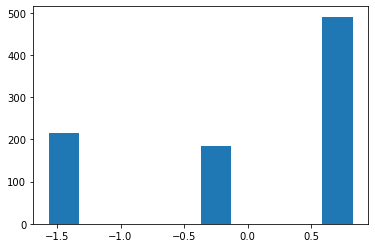

In [ ]:
plt.hist(updatedDF[1])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.01697919, -1.46876867, -0.92055814, -0.37234762,  0.1758629 ,
         0.72407342,  1.27228395,  1.82049447,  2.36870499,  2.91691551,
         3.46512604]),
 <BarContainer object of 10 artists>)

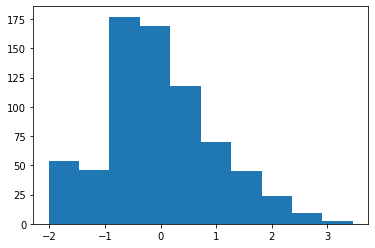

In [ ]:
plt.hist(updatedDF[2])

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

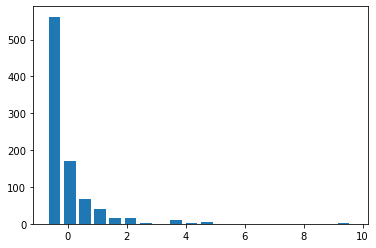

In [ ]:
plt.hist(updatedDF[3],bins=20,width=0.4)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
minmax=MinMaxScaler()

In [ ]:
minmaxDF=minmax.fit_transform(df)
minmaxDF

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        ,        nan, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [ ]:
newupdatedDF=pd.DataFrame(minmaxDF)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

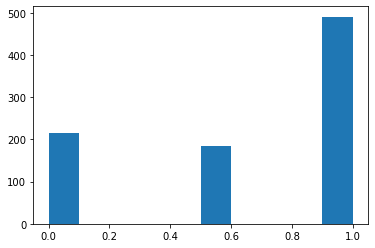

In [ ]:
plt.hist(newupdatedDF[1])

##### Min Max Scaling  
Works well with (### CNN)---Deep Learning Techniques

Min Max Scaling scales the values between 0 to 1.

X_scaled = (X - X.min / (X.max - X.min)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()


In [ ]:
df=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv",usecols=['Pclass','Age','Fare','Survived'])
df.Age.fillna(df['Age'].median(),inplace=True)
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

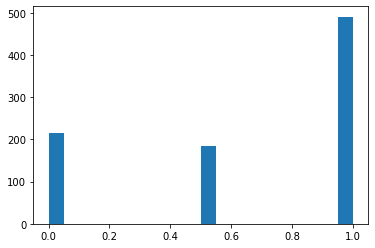

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

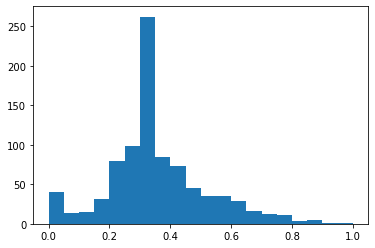

In [ ]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

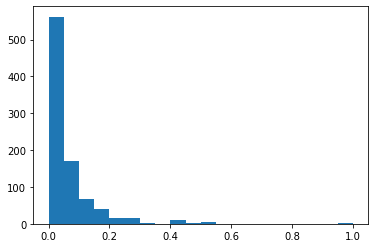

In [ ]:
plt.hist(df_minmax['Fare'],bins=20)

##### Robust Scaler
It is used to scale the feature to median and quantiles.

Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9

1-10 precentile---10% of all values in this group is less than 1

4-40%

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

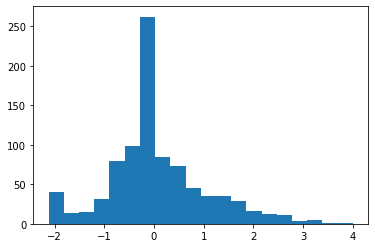

In [ ]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

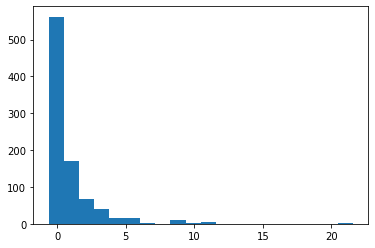

In [ ]:
plt.hist(df_robust_scaler['Fare'],bins=20)

#### Guassian Transformation (Normal Distribuation)

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [ ]:
df=pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\ML Learning\eda files from drive\titanic.csv",usecols=['Pclass','Age','Fare','Survived'])

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [ ]:
from sklearn.preprocessing import RobustScaler
scaling=RobustScaler()

In [ ]:
df_robust_scaling=pd.DataFrame(scaling.fit_transform(df),columns=df.columns)

In [ ]:
df_robust_scaling.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


In [ ]:
df_robust_scaling.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,-0.691358,0.104737,0.768745
std,0.486592,0.836071,1.001515,2.152200
min,0.000000,-2.000000,-2.121538,-0.626005
25%,0.000000,-1.000000,-0.461538,-0.283409
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.538462,0.716591
max,1.000000,0.000000,4.000000,21.562738


In [ ]:
df_robust_scaling.Fare.mean()

0.7687447148748641

In [ ]:
df_robust_scaling.Fare.median()

0.0

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
########## to check the feature is guassian or normal distribution
###### Q-Q plot is used
def plot_data(df,feature):
    plt.figure(figsize=(10,6))  #creates a 10,6 plot area
    plt.subplot(1,2,1)   #selects 1st part of divided part- ie 1-fig are, 2-divide to 2, 1-first part
    df[feature].hist()
    plt.subplot(1,2,2) # selected the 2nd part
    stat.probplot(df[feature],dist='norm',plot=pylab)    # scipy stats are to be used here to check for normal distribution. pyplot matplotlib etc cat handle it
    plt.show()

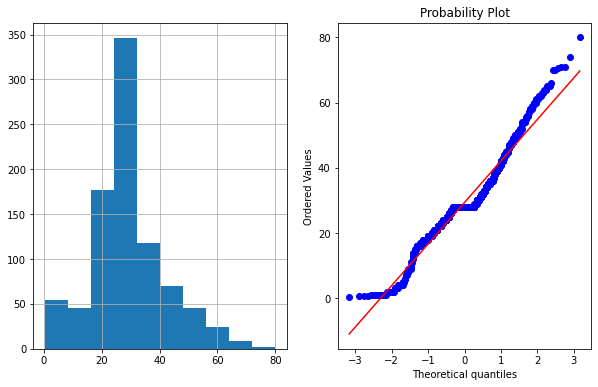

In [ ]:
plot_data(df,'Age')

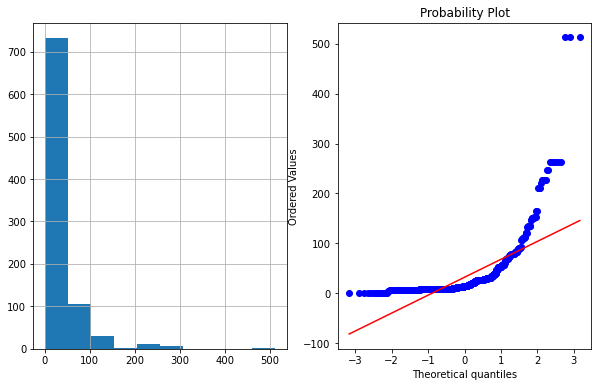

In [ ]:
plot_data(df,'Fare')

Logarithmic Transformation  

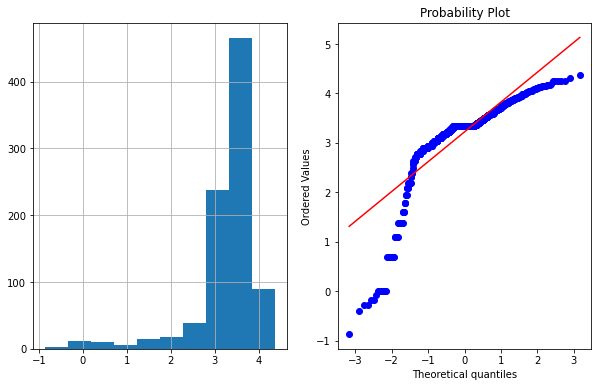

In [ ]:
import numpy as np
df['Age_log']=np.log(df['Age'])  #on taking log the distribution was made worse than normal. so not good for the data is log transformation
plot_data(df,'Age_log')

C:\Users\prave\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 6.238967387173662] is not finite

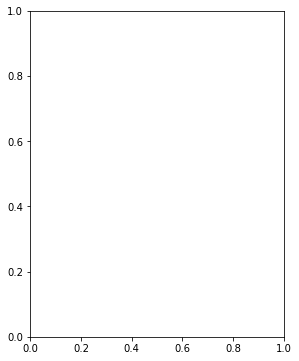

In [ ]:
df['Fare_log']=np.log(df['Fare'])
plot_data(df,'Fare_log')

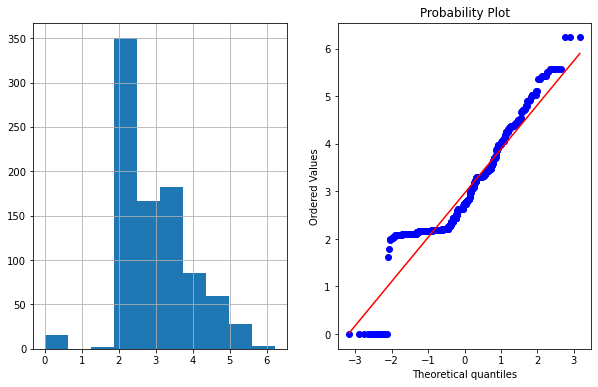

In [ ]:
df['Fare_log']=np.log1p(df['Fare'])    # fare has been made better. 1p used since log couldnt work
plot_data(df,'Fare_log')

Reciprocal Transformation

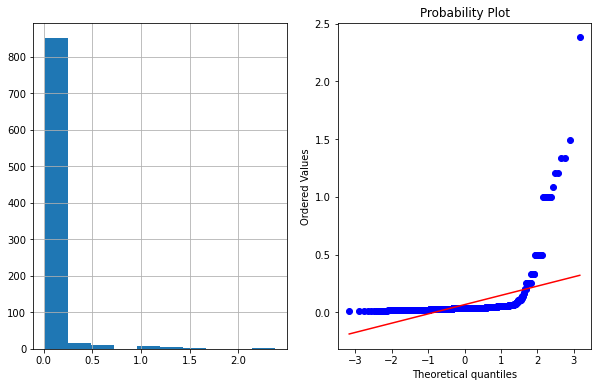

In [ ]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

Square Root Transformation

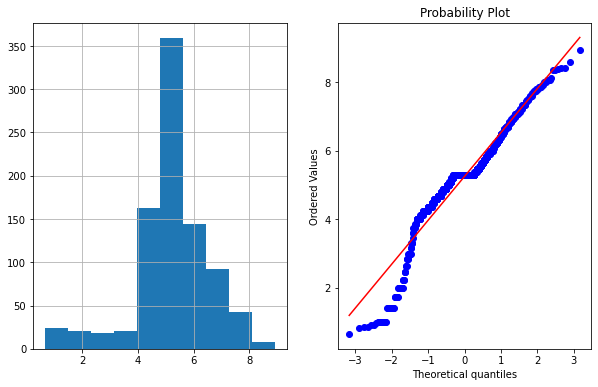

In [ ]:
df['Age_sqrt']=df.Age**(1/2)
plot_data(df,'Age_sqrt')

Exponential Transformation

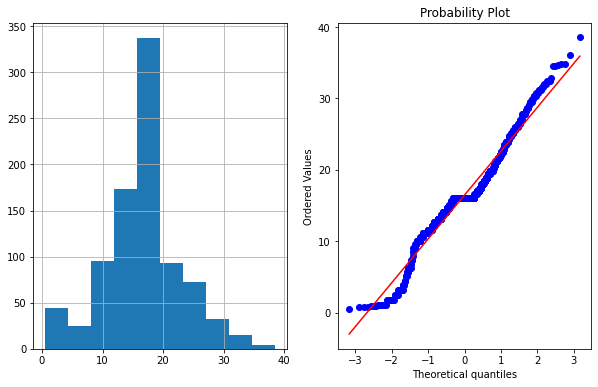

In [ ]:
df['Age_exponential']=df.Age**(1/1.2)       # ^(1/1.2) is the exponential or e
plot_data(df,'Age_exponential')

BoxCox Transformation

The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [ ]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [ ]:
print(parameters)

0.7964531473656952


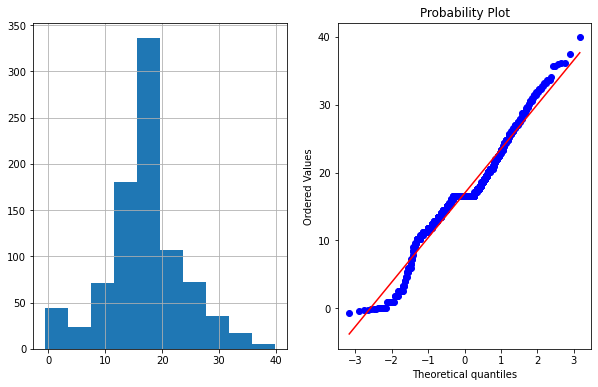

In [ ]:
plot_data(df,'Age_Boxcox')